# HW 4

* Due on **Feb-20,2024** before class
* Please comment your code and upload the Jupyter notebook file to the dropbox link given in Moodle
* Q&A: Teams or Email (binzh@hku.hk), Katie (u3007888@connect.hku.hk), Fenn (fleppard@connect.hku.hk)

### 1. Airline Routes (20%)
* Create a map of the world using **Cartopy** with the **PlateCarree** projection.
* Add longitude and latitude grid lines to your map
* Fill your map with colours (of your choice) using the **feature** attribute of cartopy
* Draw country borders, and label three countries "United States", "Argentina", and "China" using the plt.text() function.
* Mark Hong Kong, Buenos Aires and Los Angeles on your map and label them.
* Draw 2 great cirlces, one connecting Hong Kong to Los Angeles, and one connecting Hong Kong to Buenos Aires.
* Calculate the distance between Hong Kong and Buenos Aires/Los Angeles using the great_circle() function given below.
* Annotate the distance on both of your plotted great circles using the function provided below:

distance between Hong Kong and Buenos Aires is: 18515.07797844012
distance between Hong Kong and Los Angeles is: 11671.537036595402


Text(-168.15, 44.03, 'hk->la distance=11671.537036595402')

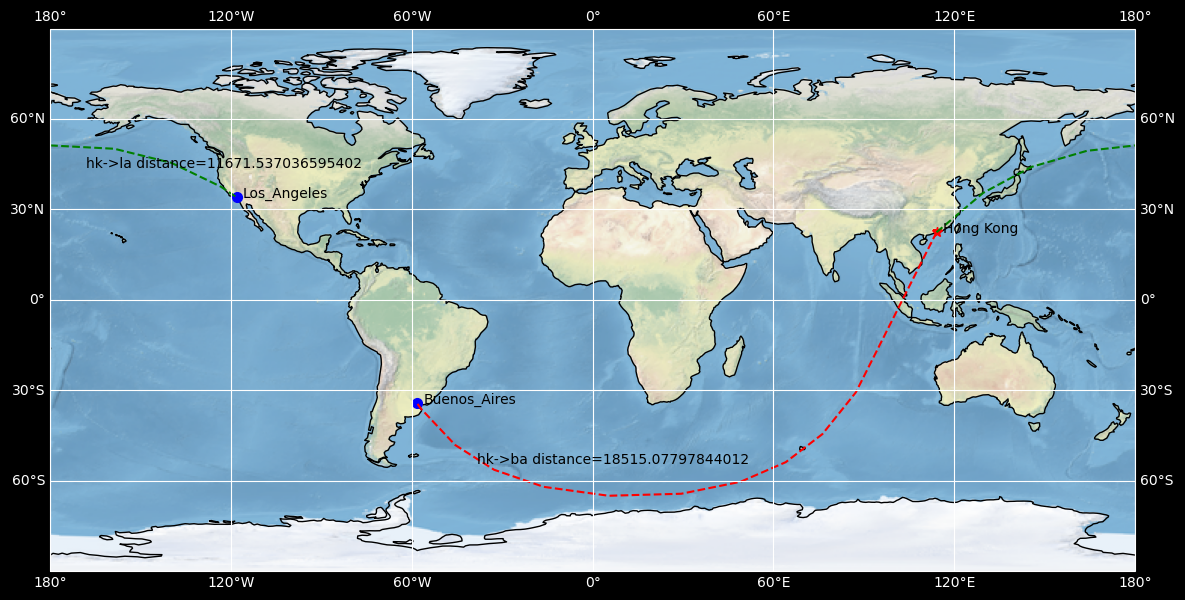

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib

def great_circle(lat_1,lon_1,lat_2,lon_2):
    """
    This code calculates the distance between two spatial points on the Earth
    INPUT: Point #1 (lat_1, lon_1) and Point #2 (lat_2, lon_2) in degrees
    OUTPUT: Distance in km
    Algorithm: Simple 3-D geometry calculation assuming the Earth is a perfect sphere
    """
    # first we have to convert the latitudes to colatitudes:
    colat_1,colat_2 = 90.-lat_1, 90.-lat_2
    # and alpha is the difference betwee the two longitudes
    alpha=lon_2-lon_1
    # Then lets make life easy on us and convert degrees to radians
    colat_1,colat_2,alpha= np.radians(colat_1),np.radians(colat_2),np.radians(alpha)# continued line from above
    # from spherical trig we know that:
    cosa=np.cos(colat_1)*np.cos(colat_2)+np.sin(colat_1)*np.sin(colat_2)*np.cos(alpha)
    # solve for a
    a=np.arccos(cosa)# take the arc cosine of cosa
    # remember to convert back to degrees!  
    distance = a*6380 # distance in km
    return distance

Hong_Kong = [114.11, 22.40]
Buenos_Aires = [-58.23, -34.37]
Los_Angeles = [-118.15, 34.03]

line1_lons = [Hong_Kong[0], Buenos_Aires[0]]
line1_lats = [Hong_Kong[1], Buenos_Aires[1]]
line2_lons = [Hong_Kong[0], Los_Angeles[0]]
line2_lats = [Hong_Kong[1], Los_Angeles[1]]

plt.figure(figsize=(14,10))
plt.rcParams['axes.facecolor'] = 'gray'
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(draw_labels= True)
ax.coastlines(resolution='110m')
ax.stock_img()
ax.set_global()

ax.plot(Hong_Kong[0], Hong_Kong[1], 'r*', markersize=7, transform=ccrs.PlateCarree())
ax.text(Hong_Kong[0]+2, Hong_Kong[1], 'Hong Kong', fontsize = 10,color='black', transform = ccrs.PlateCarree())
ax.plot(Buenos_Aires[0], Buenos_Aires[1], 'bo', markersize=7, transform=ccrs.PlateCarree())
ax.text(Buenos_Aires[0]+2, Buenos_Aires[1], 'Buenos_Aires', fontsize = 10,color='black', transform = ccrs.PlateCarree())
ax.plot(Los_Angeles[0], Los_Angeles[1], 'bo', markersize=7, transform=ccrs.PlateCarree())
ax.text(Los_Angeles[0]+2, Los_Angeles[1], 'Los_Angeles', fontsize =10,color='black', transform = ccrs.PlateCarree())


ax.plot(line1_lons, line1_lats, '--',color='r', transform=ccrs.Geodetic())
ax.plot(line2_lons, line2_lats, '--',color='g', transform=ccrs.Geodetic())

hk_ba = great_circle(line1_lats[0],line1_lons[0],line1_lats[1],line1_lons[1])
hk_la = great_circle(line2_lats[0],line2_lons[0],line2_lats[1],line2_lons[1])
print("distance between Hong Kong and Buenos Aires is: {0}".format(hk_ba))
print("distance between Hong Kong and Los Angeles is: {0}".format(hk_la))

string1 = "hk->ba distance="+str(hk_ba)
string2 = "hk->la distance="+str(hk_la)
ax.text(Buenos_Aires[0]+20, Buenos_Aires[1]-20, string1, fontsize = 10,color='black', transform = ccrs.PlateCarree())
ax.text(Los_Angeles[0]-50, Los_Angeles[1]+10, string2, fontsize =10,color='black', transform = ccrs.PlateCarree())


### 2. Recent Volcanic Eruptions (20%)

* Download the data file "recent_eruptions.txt" and save it to your current directory where your .ipynb file is. This file contains information about all confirmed volcanic eruptions fron Jan 1st 2020 til Dec 31st 2022.
* Load the data into python as stings using numpy **genfromtxt()**, the values are separated using Tab so you need to specify the delimiter as **"\t"** and skip the first row using **skip_header=1** as this row contains the column headers. 
* Each row represents one eruption; the column data goes as "Volcano Number", "Volcano Name", "Eruption Year", "Eruption Month", "Latitude", "Longitude", "VEI".
* **Produce a histogram** showing the distribution of earthquakes' VEI (Volcanic Explosivity Index). The higher the VEI the more explosive the eruption is. https://en.wikipedia.org/wiki/Volcanic_explosivity_index
* Make a global map centered on the pacific ocean using **Cartopy with the PlateCarree projection**. colour the continents "grey" (i.e., use color = 'grey') and set the alpha kewward equals to 0.2 (i.e., alpha = 0.2 in the ax.add_feature() function)
* Show the locations of volcanic eruptions on a global mapusing a global scale projection (your choice) using a scatter (or bubble) plot.
* Set the size of the bubbles based on how recent the eruption is. The most recent eruptions should be large and the oldest the smallest.
* Set the colour of the eruptions based on their VEI with the following rule: Black (VEI = 5), Red (VEI = 4), Orange (VEI = 3), Yellow (VEI = 2), Green (VEI = 1) and Blue (VEI = 0).
* Label your figure properly and include a legend (ie. use the plt.legend() function).

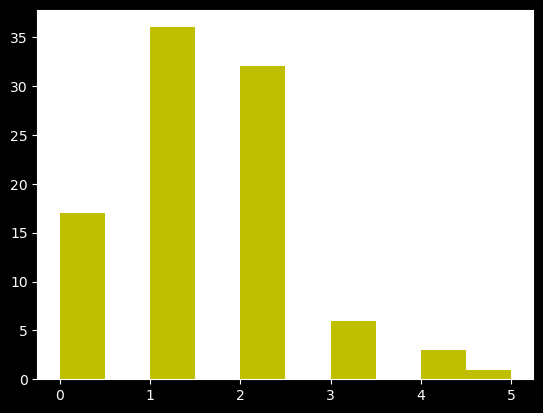

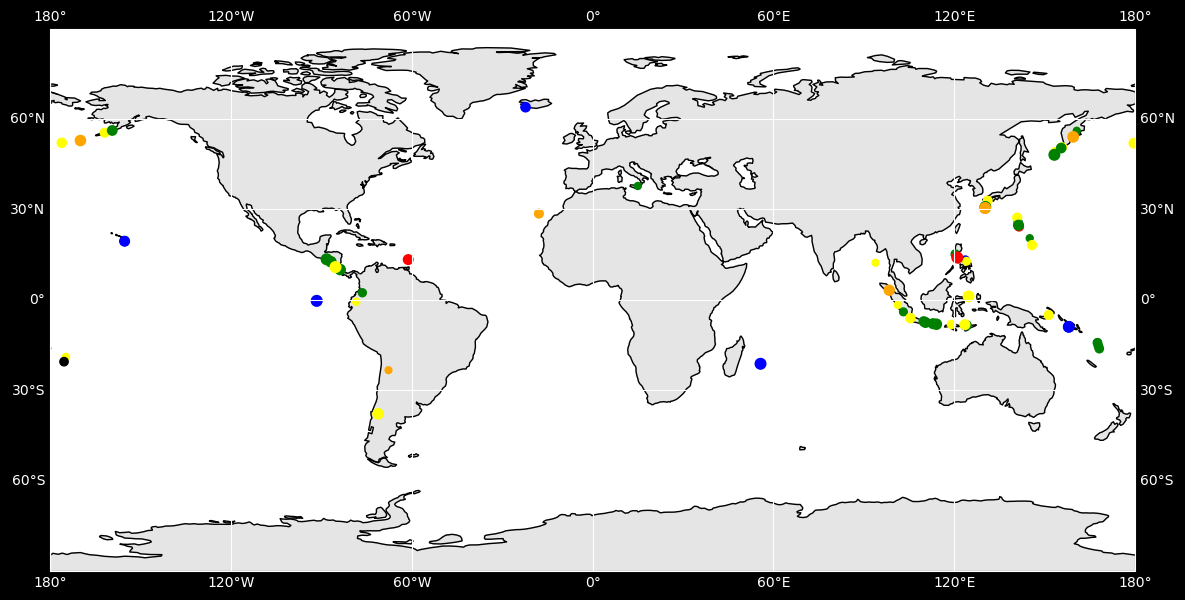

In [60]:
import numpy as np
import matplotlib.pyplot as plt
recent_eruption = np.genfromtxt("./recent_eruptions.txt", delimiter="\t", skip_header = 1)
V_Num = recent_eruption[:,0]
V_Nam1 = recent_eruption[:,1]
E_Year = recent_eruption[:,2]
E_Month = recent_eruption[:,3]
Lat = recent_eruption[:,4]
Long = recent_eruption[:,5]
VEI = recent_eruption[:, 6]

bubble_size = []
color_options = {0:'blue', 1:'green', 2:'yellow', 3:'orange', 4:'red', 5:'black'}
for index in range(0,len(E_Year)):
    sum = 0
    sum += (2024 - E_Year[index])* 12 
    sum += 12 - E_Month[index]
    bubble_size.append(sum)
bubble_color = [color_options[item] for item in VEI]


plt.hist(VEI, bins=10, color='y')
plt.show()

plt.figure(figsize=(14,10))
plt.rcParams['axes.facecolor'] = 'white'
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(draw_labels= True)
ax.coastlines(resolution='110m')
ax.set_global()
ax.add_feature(cfeature.LAND, color='grey',alpha=0.2)
ax.scatter(Long, Lat, bubble_size, color=bubble_color, transform=ccrs.PlateCarree())


### 3. Monthly Rainfall in China (30%)

* import the **cartopy.io.shapereader** package
* download the folder "China Data", this folder contains many files which describe the shapes of the regions in China.
* create a variable and use the list() function to make a list from the downloaded data. Use the shapereader.Reader("filepath").geometries() in the list function.
* For the file path, start with the file called **gadm41_CHN_1.shp**.

* Create a cartopy plot with a coastline resolution of 50m on a projection of your choice. Limit the plot using set_extent() to only show china and plot the variable you previously created.
* You should produce a plot with the regional borders shown only in China. Try changing the number at the end of the .shp file (0,1,2,3) to see the different plots you can create.

Plotting the monthly rainfall for July 2017:

* Next download the china_rainfall.txt file and import it using genfromtxt() fron numpy. The delimiter in this data is tab ("\t") and skip the header using skip_header=1.
* This data has 4 columns: Region Name, Monthly Rainfall, Longitude, Latitude.
* Produce a bubble plot with a bubble whos size corresponds to the amount of rainfall and is positioned over each region using the corresponding longitudes and latitudes.
* Make sure your plot is well presented, has lon and lat gridlines and a title.

* Find out which regions had the highest and lowest rainfalls in July 2017 and print the results (HINT: use np.where() to find the index of the region with the highets/lowest rainfall)

### 4. Typhoon Mangkhut (30%)

* Download the data file "mangkhut.txt" to your current folder
* Load the data file into Python using: the genfromtxt() function, using "\t"(Tab) as the delimiter, and skip the first row (headers)
* The column data goes as "year" "month" "day" "hour" "latitude" "longitude" "pressure" "wind speed" "class"
* Plot both the pressure and wind speed as a function of **the lifetime** of the Typhoon (e.g., in hours) in the same figure, with two different y-axis. (Hint: use the "day" and "hour" information to construct a new array called "lifetime", which is basically the age of the Typhoon in hours)
* Visualize the relationship between wind speed and pressure using a scatter plot. What do you get? Can you explain it?
* Make a bubble plot to show the track of Hurrican Mangkhut, set the size of your bubbles to be the class of the Typhoon (you may need to scale it) and the color of the bubbles based on the speed of the Typhoon follow the rules: Red (speed>=100), Orange (60<=speed<100), Yellow (30<=speed<60), Green (otherwise)
* Put on a local map with country boundaries (you may use the '50m' resolution in the .coastline() function) together with your Typhoon track, choose appropriate map boundaries to make sure the track of Mangkhut is highlighted in the center of your map. 
* What happened to the wind speed near the Luzon islands?
* Calculate the **total distance** (in km) that Typhoon Mangkhut traveled and estimate the **average speed** of the center of the typhoon (Hint: break the Typhoon track into pieces and sum over all the great-circle distance, use the function given in Prob. 1)

### [Extra Credit] Atalantic Hurricanes in 2021 (30%)

* This problem requires additional thinking/skills, since you're going to process multiple files of all the Atalantic hurricanes in 2020 (31 .csv files in this case);
* Download the data folder "AL2020" from Moodle and save to your current folder (put in in the same directory as your jupyter notebook file); Each csv file contains the track information of a hurricane, including:
    - 'Name','Year_','Month', 'Day', 'date_time','Latitude', 'Longitude', 'Maximum_sustained_wind_in_knots', 'Minimum_Pressure_in_millibars'
    - the seperator is tab (\t)
* Try the following analysis (10% each):
    1. Plot all the Atalantic Hurricane tracks in a map projection (your choice)
    2. Use all the hurricane track data, plot the relationship between maximum wind speed and minimum pressure, what do you find?
    3. Which hurricane traveled the most in terms of total distance during its lifetime? (you may consider using the code you've developed in Prob. 5)